In [3]:
#Import Nededd Library's
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os #To acsess system files 
from PIL import Image 
import tensorflow as tf 

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# Building the CNN
cnn = tf.keras.models.Sequential()

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 3nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 3nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 4nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 4nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 5nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 5nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

0
0


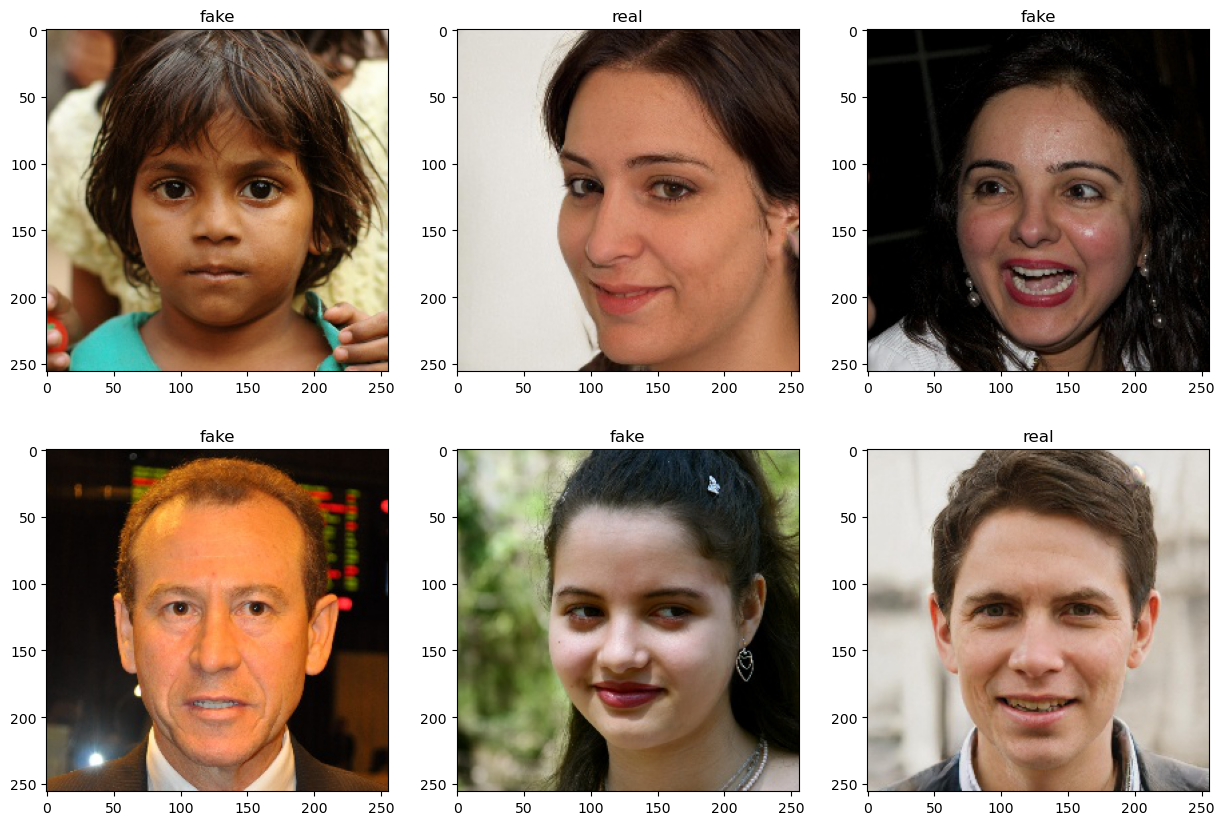

In [5]:
#Sepliting the data 
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
#Import DataFram 
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_val=pd.read_csv('valid.csv')
#Seplite X and y values
# define X ,y tarin

y_train = df_train['label']
X_train = df_train['path']
#Cheke null values in X and y values 
print(X_train.isnull().sum())
print(y_train.isnull().sum())
# define X ,y validation
y_val = df_val['label']
X_val = df_val['path']
# define X ,y test
y_test = df_test['label']
X_test = df_test['path']
label_arg = {0:'real', 1:'fake'}
#Show random pictures from the the data sets
fig, axs = plt.subplots(2,3,figsize=(15,10))
for i in range(2):
    for j in range(3):
        random_idx = np.random.randint(0,100000,1)
        img = Image.open(X_train.iloc[int(random_idx)])
        label = y_train.iloc[int(random_idx)]
        axs[i,j].imshow(img)
        axs[i,j].set_title(label_arg[label])

In [11]:
# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Generating images for the Validation set
validation_datagen = ImageDataGenerator(rescale = 1./255)
# Creating the Training set
#DataSet Link
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')
# Creating the Validation set
validation_set = validation_datagen.flow_from_directory('valid',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


<BarContainer object of 2 artists>

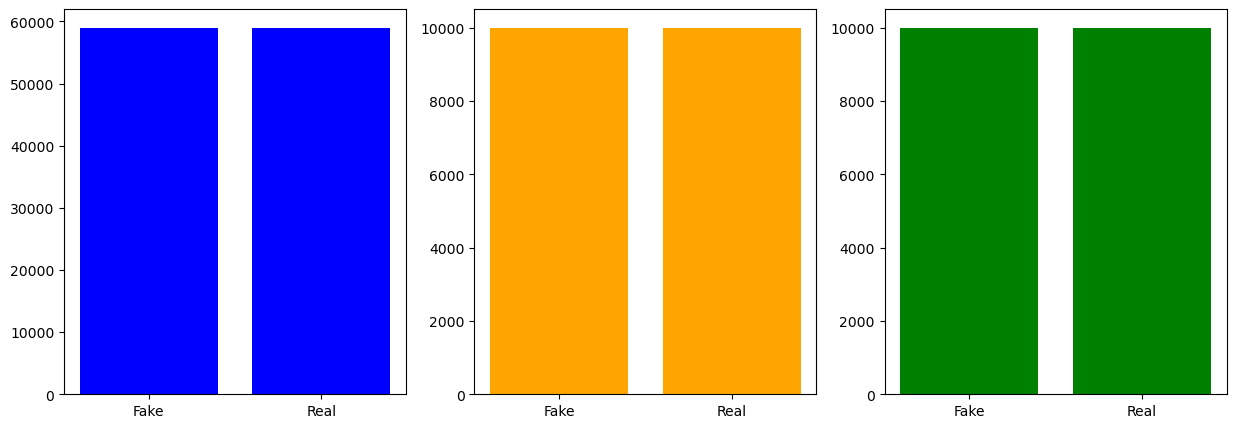

In [6]:
#Check class balance for each dataset
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].bar(y_train.value_counts().index, y_train.value_counts(), tick_label=['Real','Fake'],color='blue')
axs[1].bar(y_val.value_counts().index, y_test.value_counts(), tick_label=['Real','Fake'], color='orange')
axs[2].bar(y_test.value_counts().index, y_val.value_counts(), tick_label=['Real','Fake'], color='green')

In [54]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)      

In [55]:
#Fit the model 
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 1250,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 624)

Epoch 1/25
1250/1250 [==============================] - 2630s 2s/step - loss: 0.6236 - accuracy: 0.6465 - val_loss: 0.5614 - val_accuracy: 0.7066
Epoch 2/25
1250/1250 [==============================] - 2640s 2s/step - loss: 0.5403 - accuracy: 0.7311 - val_loss: 0.5014 - val_accuracy: 0.7538
Epoch 3/25
1250/1250 [==============================] - 1700s 1s/step - loss: 0.4918 - accuracy: 0.7637 - val_loss: 0.4841 - val_accuracy: 0.7660
Epoch 4/25
1250/1250 [==============================] - 1667s 1s/step - loss: 0.4481 - accuracy: 0.7907 - val_loss: 0.4114 - val_accuracy: 0.8086
Epoch 5/25
1250/1250 [==============================] - 1652s 1s/step - loss: 0.4184 - accuracy: 0.8100 - val_loss: 0.3822 - val_accuracy: 0.8295
Epoch 6/25
1250/1250 [==============================] - 1646s 1s/step - loss: 0.3930 - accuracy: 0.8224 - val_loss: 0.3666 - val_accuracy: 0.8348
Epoch 7/25
1250/1250 [==============================] - 1702s 1s/step - loss: 0.3713 - accuracy: 0.8370 - val_loss: 0.3780 -

In [57]:
# Compute Accuracy of training, testing, validation
test_accu = cnn.evaluate(training_set,steps=624)
print('The training accuracy is :',test_accu[1]*100, '%')
test_accu = cnn.evaluate(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')
test_accu = cnn.evaluate(validation_set,steps=624)
print('The validation accuracy is :',test_accu[1]*100, '%')

624/624 [==============================] - 421s 674ms/step - loss: 0.2438 - accuracy: 0.8987
The training accuracy is : 89.87379670143127 %
624/624 [==============================] - 164s 263ms/step - loss: 0.2625 - accuracy: 0.8917
The testing accuracy is : 89.1676664352417 %
624/624 [==============================] - 237s 380ms/step - loss: 0.2697 - accuracy: 0.8894
The validation accuracy is : 88.93730044364929 %


1/1 [==============================] - 0s 234ms/step
fake


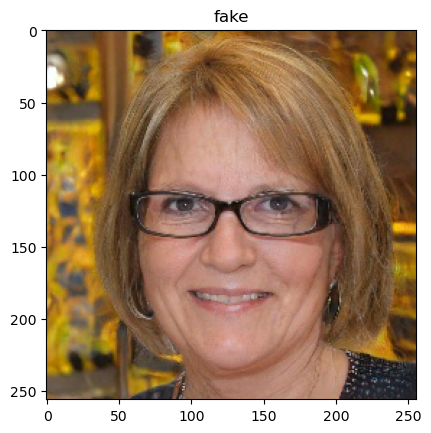

In [61]:
#Define method to predict image in evry method call

from tensorflow.keras.utils import load_img
def testImage(par):
    
 

 img = np.array(par)

 img = img / 255.0

 img = img.reshape(1,256, 256,3)

 label = cnn.predict(img)

 if label[0][0] > 0.5:
    print('real')
    label='real'
    
 else:
    print('fake')
    label='fake'
    
 plt.title(label)
 plt.imshow(image1)



image1 = load_img('f (7).jpg',target_size=(256, 256))
testImage(image1)

In [12]:
#confusion matrix of testing Set
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix(test_set.classes, y_pred)

625/625 [==============================] - 263s 421ms/step


array([[10000,     0],
       [10000,     0]], dtype=int64)

In [13]:
#confusion matrix of Trainig Set

Y_pred = cnn.predict(training_set, 100)

y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix(training_set.classes, y_pred)

3125/3125 [==============================] - 2021s 647ms/step


array([[50000,     0],
       [50000,     0]], dtype=int64)

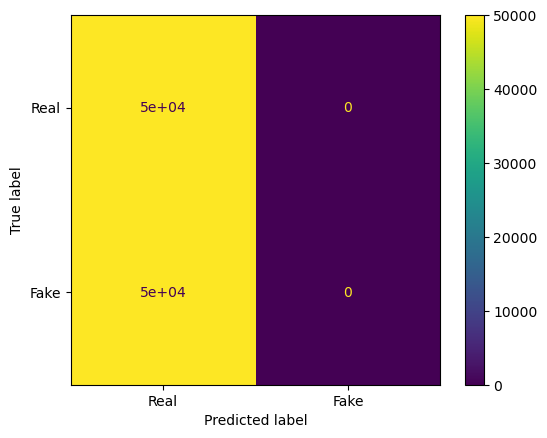

In [14]:
#plot the confusion Trainig for the Training dataset
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(training_set.classes, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Real', 'Fake'])

cm_display.plot()
plt.show()